<a href="https://colab.research.google.com/github/nurulvita/Data-Mining/blob/main/Datmin_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Angka Profitabilitas dan Prediksi Keberhasilan Genre Film dengan Memperhitungkan Faktor-Faktor yang Mempengaruhi**

#**Import Library**

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

#**BUSINESS UNDERSTANDING**

##**Business Objective**



Tujuan bisnis dari dataset ini adalah untuk mengoptimalkan investasi di industri film dengan memprediksi potensi genre film dengan tingkat keberhasilan tinggi, dengan fokus pada peningkatan profitabilitas produksi. Dengan menganalisis tren industri film, sejarah profitabilitas film di masa lalu, dan faktor-faktor kunci yang mempengaruhi kesuksesan genre film


##**Assess Situation**



Analisis profitabilitas film dengan melihat profibilitas film-film sebelumnya serta menganalisis genre yang telah sukses dan tidak sukses secara finansial.



##**Data Mining Goals**




1.   Prediksi keberhasilan penjualan tiket berdasarkan genre: Mengidentifikasi pola dan tren  genre film yang menghasilkan profitabilitas tinggi.
2.   Pemodelan Prediktif: Mengembangkan model prediktif yang memprediksi kesuksesan finansial sebuah film berdasarkan faktor-faktor tertentu.



##**Project Plan**


Langkah pertama dalam proyek ini adalah mengumpulkan data film sebelumnya, termasuk informasi pendapatan kotor, penjualan tiket, dan angka yang disesuaikan dengan inflasi serta data relevan lainnya. Proses pengumpulan ini dilanjutkan dengan pengolahan data, termasuk pembersihan data dan pengintegrasian informasi dari berbagai sumber untuk menjamin kualitas dan konsistensi data. Analisis statistik kemudian dilakukan  untuk menilai tren dan korelasi  antara faktor-faktor yang mempengaruhi kesuksesan film. Dengan menggunakan teknik penambangan data, model prediktif telah dikembangkan yang dapat memprediksi keberhasilan suatu genre film berdasarkan faktor-faktor yang  diidentifikasi. Validasi model dilakukan melalui pengujian terhadap data film yang tidak terlibat dalam pengembangan model. Selain itu, model prediktif digunakan dalam  keputusan investasi di industri film. Evaluasi rutin dilakukan untuk memastikan bahwa model tersebut tetap relevan dan diperbarui sebagai respons terhadap perubahan tren industri dan faktor lain yang memengaruhi kesuksesan sebuah film.








#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber Dataset :
[Dataset Film Genre](https://www.kaggle.com/datasets/thedevastator/film-genre-statistics)

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/nurulvita/Data-Mining/main/ThrowbackDataThursday%20Week%2011%20-%20Film%20Genre%20Stats.csv')

In [8]:
df.head()

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


##**Describe Data**

####Informasi Dasar

In [9]:
df

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08
...,...,...,...,...,...,...,...,...,...,...
295,295,Multiple Genres,2017,5,4614134,514394,4614114,2017 Oscar Shorts,2835355,2.835343e+06
296,296,Multiple Genres,2018,3,4787450,533717,4787441,2018 Oscar Shorts,3508777,3.508770e+06
297,297,Reality,2014,1,16826,2059,18469,The Principle,16826,1.846900e+04
298,298,Reality,2015,3,604870,71751,643606,Benpao Ba! Xiongdi,309297,3.291044e+05


In [10]:
df.shape

(300, 10)

Dataset ini terdapat 300 baris dan 10 kolom yang berisi 299 data

####Informasi Lanjutan

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   index                                           300 non-null    int64  
 1   Genre                                           300 non-null    object 
 2   Year                                            300 non-null    int64  
 3   Movies Released                                 300 non-null    int64  
 4   Gross                                           300 non-null    int64  
 5   Tickets Sold                                    300 non-null    int64  
 6   Inflation-Adjusted Gross                        300 non-null    int64  
 7   Top Movie                                       300 non-null    object 
 8   Top Movie Gross (That Year)                     300 non-null    int64  
 9   Top Movie Inflation-Adjusted Gross (That Ye


1.   Genre : Kategori atau jenis film. (String)
2.   Year : Tahun saat film dirilis. (Integer)
3.   Movie Released : Jumlah film yang dirilis dalam genre dan tahun tertentu. (Integer)
4.   Gross : Total pendapatan kotor yang dihasilkan oleh film dalam genre dan tahun tersebut. (Integer)
5.   Tickets Sold : Jumlah total tiket yang terjual untuk film dalam genre dan tahun tersebut. (Integer)
6.   Inflation-Adjusted Gross : Pendapatan kotor yang disesuaikan dengan inflasi, dengan mempertimbangkan perubahan nilai uang dari waktu ke waktu. (Integer)
7.   Top Movie : Judul film dengan pendapatan kotor tertinggi dalam genre dan tahun tersebut. (String)
8. Top Movie Gross : Pendapatan kotor yang dihasilkan oleh film dengan pendapatan kotor tertinggi dalam genre dan tahun tersebut. (Integer)
9.  Top Movie Inflation-Adjusted Gross : Pendapatan kotor film terlaris yang disesuaikan dengan inflasi dalam genre dan tahun tersebut. (Float)

In [12]:
total = df['Tickets Sold'].sum()
total

32362307172

In [13]:
data = pd.DataFrame(df)
data

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08
...,...,...,...,...,...,...,...,...,...,...
295,295,Multiple Genres,2017,5,4614134,514394,4614114,2017 Oscar Shorts,2835355,2.835343e+06
296,296,Multiple Genres,2018,3,4787450,533717,4787441,2018 Oscar Shorts,3508777,3.508770e+06
297,297,Reality,2014,1,16826,2059,18469,The Principle,16826,1.846900e+04
298,298,Reality,2015,3,604870,71751,643606,Benpao Ba! Xiongdi,309297,3.291044e+05


####Informasi Statistik Deskriptif

In [14]:
df.describe()

,index,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
count,300.000000,300.000000,300.000000,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,149.500000,2006.963333,46.700000,7.382075e+08,1.078744e+08,9.676330e+08,1.350016e+08,1.766255e+08
std,86.746758,6.801189,60.938398,8.783016e+08,1.227454e+08,1.101026e+09,1.395006e+08,1.737089e+08
min,0.000000,1995.000000,1.000000,2.010000e+03,2.250000e+02,2.018000e+03,2.010000e+03,2.018000e+03
25%,74.750000,2001.000000,6.000000,5.786591e+07,8.275600e+06,7.423214e+07,2.528707e+07,3.603908e+07
50%,149.500000,2007.000000,25.000000,3.694118e+08,5.634667e+07,5.054296e+08,9.351396e+07,1.223360e+08
75%,224.250000,2013.000000,56.250000,1.294524e+09,1.859968e+08,1.668391e+09,1.886230e+08,2.841907e+08
max,299.000000,2018.000000,287.000000,4.159138e+09,4.851841e+08,4.352101e+09,7.422089e+08,8.478831e+08


In [15]:
df.corr(numeric_only=True)

,index,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
index,1.000000,0.170804,-0.452522,-0.826705,-0.873588,-0.873588,-0.739793,-0.796852
Year,0.170804,1.000000,0.157161,0.105170,-0.089789,-0.089789,0.135810,-0.092884
Movies Released,-0.452522,0.157161,1.000000,0.412978,0.401281,0.401281,0.235386,0.210184
Gross,-0.826705,0.105170,0.412978,1.000000,0.955279,0.955279,0.857945,0.809520
Tickets Sold,-0.873588,-0.089789,0.401281,0.955279,1.000000,1.000000,0.802512,0.843960
Inflation-Adjusted Gross,-0.873588,-0.089789,0.401281,0.955279,1.000000,1.000000,0.802512,0.843960
Top Movie Gross (That Year),-0.739793,0.135810,0.235386,0.857945,0.802512,0.802512,1.000000,0.945117
Top Movie Inflation-Adjusted Gross (That Year),-0.796852,-0.092884,0.210184,0.809520,0.843960,0.843960,0.945117,1.000000


Korelasi :


*   Gross dan Tickets Sold: Korelasi ini menunjukkan hubungan positif yang kuat (0,955279) antara pendapatan kotor film dan jumlah tiket yang terjual. Hal ini menunjukkan bahwa semakin banyak tiket yang terjual, semakin tinggi pendapatan kotor film.
*   Gross dan Inflation-Adjusted Gross: Korelasi ini menunjukkan hubungan positif yang kuat (0,955279) antara pendapatan kotor film dan pendapatan kotor film yang disesuaikan dengan inflasi. Hal ini menunjukkan bahwa pendapatan kotor film meningkat seiring waktu ketika inflasi diperhitungkan.
*   Tickets Sold dan Inflation-Adjusted Gross: Korelasi ini menunjukkan hubungan positif yang kuat (1,000000) antara jumlah tiket yang terjual dan pendapatan kotor film yang disesuaikan dengan inflasi. Hal ini menunjukkan bahwa semakin banyak tiket yang terjual, semakin tinggi pendapatan kotor film, bahkan ketika inflasi diperhitungkan.
*   Top Movie Gross (That Year) dan Gross (That Year): Korelasi ini menunjukkan hubungan positif yang kuat (0,857945) antara pendapatan kotor film terlaris pada tahun itu dan pendapatan kotor total film pada tahun itu. Hal ini menunjukkan bahwa ketika film terlaris menghasilkan banyak uang, film lain pada tahun itu juga cenderung menghasilkan banyak uang.
*   Top Movie Inflation-Adjusted Gross (That Year) dan Gross (That Year): Korelasi ini menunjukkan hubungan positif yang kuat (0,843960) antara pendapatan kotor film terlaris pada tahun itu yang disesuaikan dengan inflasi dan pendapatan kotor total film pada tahun itu. Hal ini menunjukkan bahwa ketika film terlaris menghasilkan banyak uang, even when adjusted for inflation, other films that year also tend to make more money.

* Top Movie Gross and Top Movie Inflation-Adjusted Gross : Korelasi positif kuat (1,000000) menunjukkan bahwa film dengan pendapatan kotor tertinggi dalam satu tahun biasanya juga memiliki pendapatan kotor yang disesuaikan inflasi tertinggi.

##**Exploratory Data Analysis**

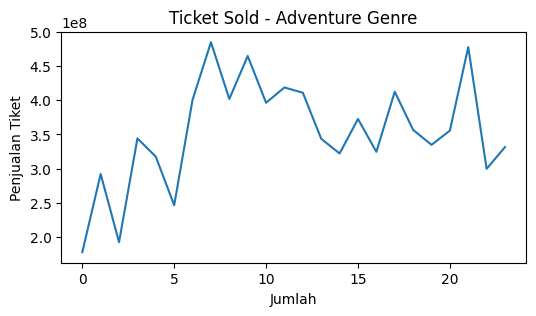

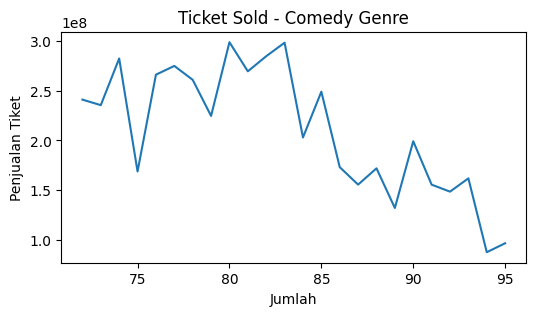

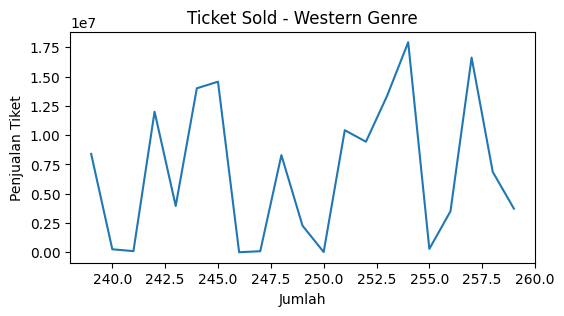

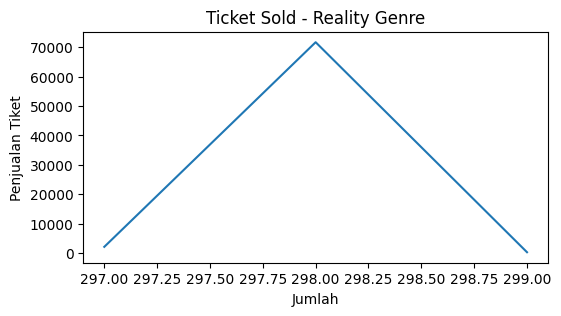

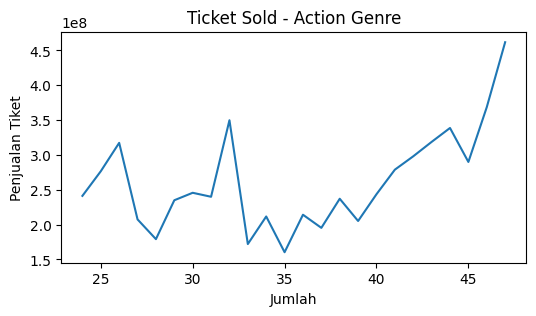

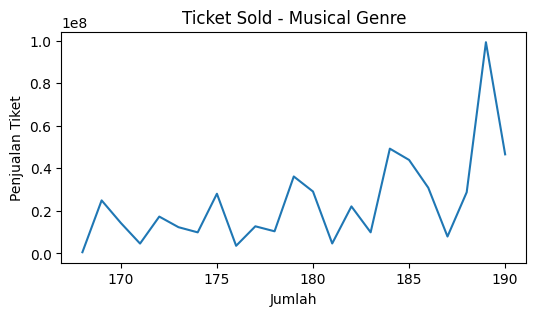

In [16]:
def plot_genre(data, genre):
    genre_data = data[data['Genre'] == genre]
    genre_data['Tickets Sold'].plot(kind='line', figsize=(6, 3), title=f'Ticket Sold - {genre} Genre')
    plt.gca().spines[['top', 'right']].set_visible(True)
    plt.xlabel('Jumlah')
    plt.ylabel('Penjualan Tiket')
    plt.show()

selected_genres = ['Adventure', 'Comedy', 'Western', 'Reality','Action', 'Musical']

for genre in selected_genres:
    plot_genre(data, genre)

Grafik diatas menunjukkan hasil tiket yang terjual berdasarkan beberapa genre film yang terdapat dalam dataset. Terlihat dari grafik untuk genre 'Reality' memiliki garis lurus saja dan mengalami penurunan. Film dengan genre 'Reality' hanya didistribusikan pada tahun 2014, 2015 dan 2018 saja karena kurangnya ketertarikan oleh penonton film pada genre ini.

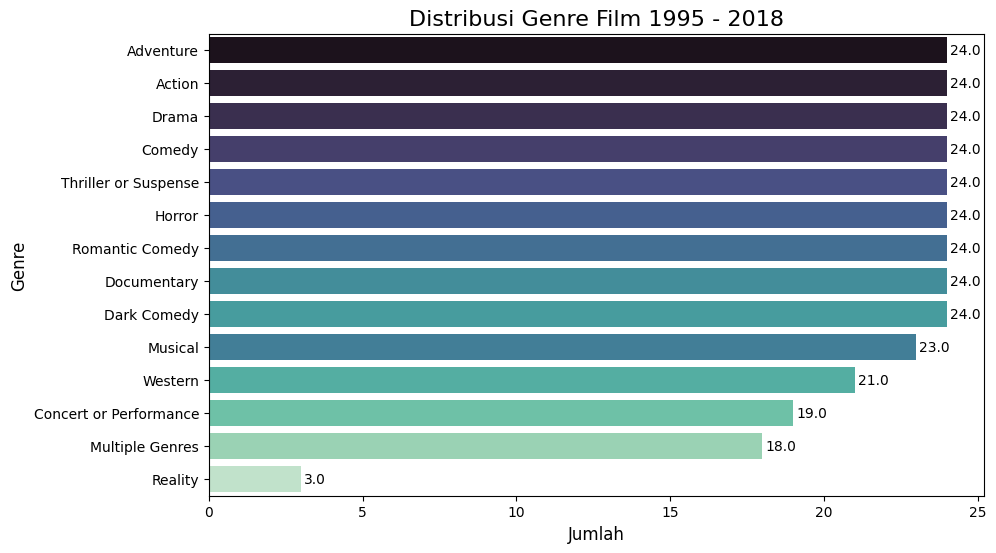

In [17]:
color_palette = sns.color_palette("mako", n_colors=len(data['Genre'].unique()))

plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Genre', data=data, palette=color_palette, hue='Genre', order=data['Genre'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.title('Distribusi Genre Film 1995 - 2018', fontsize=16)
plt.xlabel('Jumlah', fontsize=12)
plt.ylabel('Genre', fontsize=12)

plt.show()

Visualisasi data diatas menunjukkan bahwa genre film yang paling umum didistribusikan dari tahun 1995 - 2018 adalah genre yang menarik bagi khalayak luas. Genre ini termasuk film petualangan, aksi, drama, komedi, dan thriller atau ketegangan, horor, komedi romantis dan film dokumenter. Genre film yang paling sedikit didistribusikan adalah genre yang menarik bagi khalayak yang lebih kecil. Genre ini termasuk film realita.

##**Verify Data Quality**

####Missing Values

In [18]:
pd.DataFrame(df.isna().sum()/len(df)* 100, columns=['Null Ratio %'])

,Null Ratio %
index,0.0
Genre,0.0
Year,0.0
Movies Released,0.0
Gross,0.0
Tickets Sold,0.0
Inflation-Adjusted Gross,0.0
Top Movie,0.0
Top Movie Gross (That Year),0.0
Top Movie Inflation-Adjusted Gross (That Year),0.0


Semua kolom memiliki rasio null 0%, yang berarti tidak ada data yang kosong

In [19]:
df.isna().sum()

index                                             0
Genre                                             0
Year                                              0
Movies Released                                   0
Gross                                             0
Tickets Sold                                      0
Inflation-Adjusted Gross                          0
Top Movie                                         0
Top Movie Gross (That Year)                       0
Top Movie Inflation-Adjusted Gross (That Year)    0
dtype: int64

Hasilnya menunjukkan bahwa tidak ada nilai NaN di kolom mana pun.

####Outliers Values

In [20]:
fig = px.scatter(df, x='Top Movie Gross (That Year)', y='Gross', color='Genre', title='Hasil Pendapatan Kotor yang dihasilkan oleh genre film tiap tahun (1995 - 2018).',
                 labels={'Top Movie Gross (That Year)': 'Top Movie Gross', 'Gross': 'Gross', 'Genre': 'Genre'})
fig.update_layout(xaxis_title='Top Movie Gross (That Year)', yaxis_title='Gross')

fig.show()

Berdasarkan visualisasi diatas dapat diambil kesimpulan yaitu terdapat outliers pada hasil pendapatan kotor berdasarkan genre film. Nilai yang ada di outliers yaitu genre 'Action' dan ' Adventure' yang memiliki pendapatan kotor jauh lebih tinggi dibandingkan genre lain dalam dataset.

####Duplicated Values

In [21]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Length: 300, dtype: bool

Berdasarkan analisis awal terhadap data di atas, dapat disimpulkan bahwa data tersebut menunjukkan kualitas yang baik karena tidak mengandung nilai yang kosong atau duplikat.

#**DATA PREPARATION**

# **Data Cleaning**



In [22]:
df5 = pd.read_csv('https://raw.githubusercontent.com/nurulvita/Data-Mining/main/ThrowbackDataThursday%20Week%2011%20-%20Film%20Genre%20Stats.csv')
df5.head()

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


###**Penanganan Missing Value**

#####**Pengecekkan Missing Values**

In [23]:
print((df5.isna().sum() / len(df5)) * 100)

index                                             0.0
Genre                                             0.0
Year                                              0.0
Movies Released                                   0.0
Gross                                             0.0
Tickets Sold                                      0.0
Inflation-Adjusted Gross                          0.0
Top Movie                                         0.0
Top Movie Gross (That Year)                       0.0
Top Movie Inflation-Adjusted Gross (That Year)    0.0
dtype: float64


Pada dataset ini tidak terdapat data yang kosong

#####**Pengecekkan Ulang**

In [24]:
pd.DataFrame(df5.isna().sum() / len(df5) * 100, columns=['Null Ratio %'])

,Null Ratio %
index,0.0
Genre,0.0
Year,0.0
Movies Released,0.0
Gross,0.0
Tickets Sold,0.0
Inflation-Adjusted Gross,0.0
Top Movie,0.0
Top Movie Gross (That Year),0.0
Top Movie Inflation-Adjusted Gross (That Year),0.0


###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [25]:
df5[df5.duplicated()]

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)


Pada dataset ini tidak terdapat nilai yang terduplikat

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [26]:
results = []

cols = df5.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df5[col].quantile(0.25)
  q3 = df5[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df5[(df5[col] < lower_bound) | (df5[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df5))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
index,0.000000
Year,0.000000
Movies Released,9.666667
Gross,1.666667
Tickets Sold,1.333333
Inflation-Adjusted Gross,1.333333
Top Movie Gross (That Year),3.666667
Top Movie Inflation-Adjusted Gross (That Year),2.000000


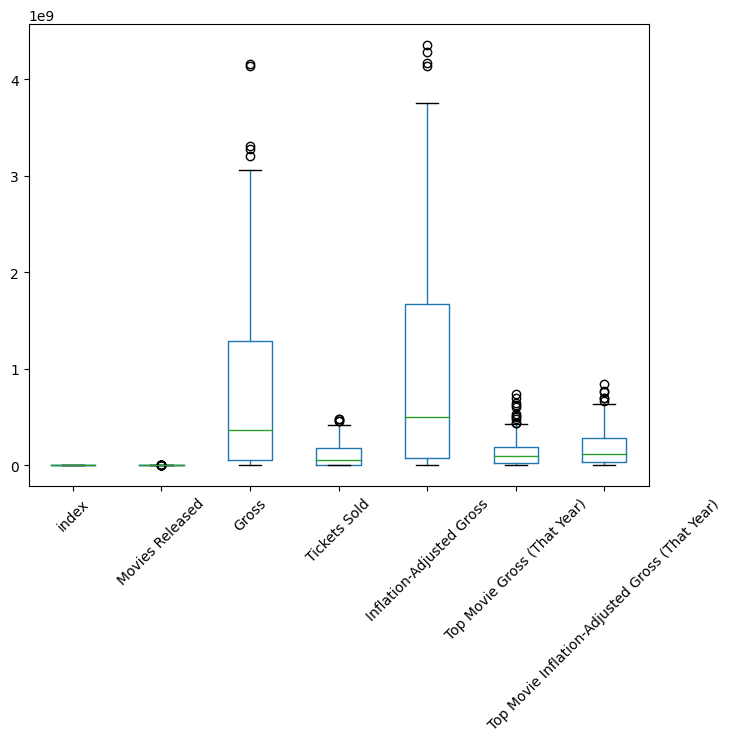

In [27]:
boxplot = df5.drop(['Year'], axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Dari visualisasi diatas dapat disimpulkan data film ini menunjukkan outliers paling tinggi terdapat pada 'inflation adjusted gross' dan gross, terdapat pula banyak outliers di 'Top Movie Gross (That Year)'

In [28]:
import plotly.express as px

melted_df = df5.melt(value_vars=df5.columns, var_name='Column', value_name='Value')

fig = px.box(melted_df, x='Column', y='Value',
             title='Box Plot for Each Numerical Column with Outlier Percentage',
             labels={'Column': 'Column', 'Value': 'Value'},
             template='plotly_white')

fig.update_xaxes(tickangle=45)


for col, percentage in zip(results_df.index, results_df['Persentase Outliers']):
    col_values = df5[col].tolist()
    outliers = results_df.loc[col, 'Persentase Outliers']
    max_value = max(col_values)

    fig.add_annotation(
        x=col,
        y=max_value,
        text=f"{outliers:.2f}% Outliers",
        showarrow=True,
        arrowhead=2,
        arrowcolor='red',
        ax=0,
        ay=-40
    )

fig.show()



#####**Hapus Outliers**

In [29]:
Q1 = df5['Top Movie Gross (That Year)'].quantile(0.25)
Q3 = df5['Top Movie Gross (That Year)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df5 = df5[(df5['Top Movie Gross (That Year)'] >= lower_bound) & (df5['Top Movie Gross (That Year)'] <= upper_bound)]

Alasan menghapus kolom 'Top Movie Gross (That Year)' dikarenakan kolom ini tidak memberikan kontribusi yang signifikan terhadap tujuan analisis data ini atau tidak memiliki dampak yang besar terhadap hasil analisis.

#####**Imputasi Outliers**

In [30]:
Q1 = df5['Gross'].quantile(0.25)
Q3 = df5['Gross'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df5['Gross']=np.where(df5['Gross']>upper_whisker,upper_whisker,np.where(df5['Gross']<lower_whisker,lower_whisker,df5['Gross']))

<ipython-input-30-615c64de6fea>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#####**Pengecekkan Ulang**

In [31]:
results = []

cols = df5.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df5[col].quantile(0.25)
  q3 = df5[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df5[(df5[col] < lower_bound) | (df5[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df5))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
index,0.000000
Year,0.000000
Movies Released,9.688581
Gross,0.000000
Tickets Sold,0.346021
Inflation-Adjusted Gross,0.346021
Top Movie Gross (That Year),3.806228
Top Movie Inflation-Adjusted Gross (That Year),1.038062


Setelah outliers di imputasi maka dapat dilihat pada tabel outliers gross menjadi 0

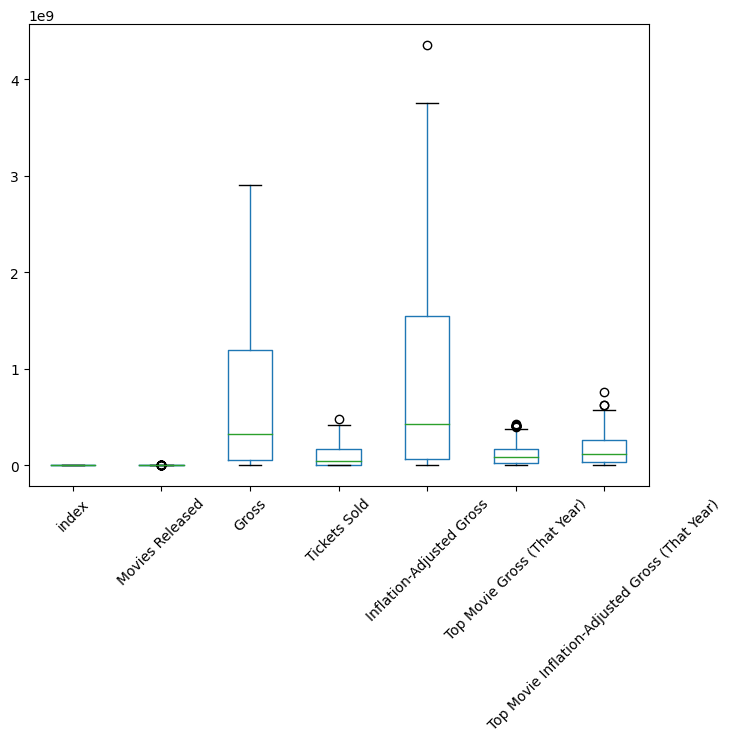

In [32]:
boxplot = df5.drop(['Year'], axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Visualisasi diatas merupakan hasil setelah outliers dihapus dan di imputasi, dimana hasil outliernya berkurang

# **Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [33]:
def ticket_sold(Tickets_Sold):
    if Tickets_Sold < 100000:
        return 'Unpopular'
    elif 100000 <= Tickets_Sold < 1000000:
        return 'Popular'
    else:
        return 'Very Popular'

df5['Tickets Sold Category']= df5['Tickets Sold'].apply(ticket_sold)


In [34]:
df5

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year),Tickets Sold Category
0,0,Adventure,1995,29,7.715076e+08,177358047,1590901682,Toy Story,150148222,3.096160e+08,Very Popular
1,1,Adventure,1996,34,1.290490e+09,291966054,2618935504,Independence Day,306169255,6.213435e+08,Very Popular
2,2,Adventure,1997,23,8.819028e+08,192135684,1723457085,Men in Black,250650052,4.898324e+08,Very Popular
3,3,Adventure,1998,29,1.614468e+09,344236174,3087798481,Armageddon,201578182,3.855344e+08,Very Popular
4,4,Adventure,1999,27,1.612432e+09,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08,Very Popular
...,...,...,...,...,...,...,...,...,...,...,...
295,295,Multiple Genres,2017,5,4.614134e+06,514394,4614114,2017 Oscar Shorts,2835355,2.835343e+06,Popular
296,296,Multiple Genres,2018,3,4.787450e+06,533717,4787441,2018 Oscar Shorts,3508777,3.508770e+06,Popular
297,297,Reality,2014,1,1.682600e+04,2059,18469,The Principle,16826,1.846900e+04,Unpopular
298,298,Reality,2015,3,6.048700e+05,71751,643606,Benpao Ba! Xiongdi,309297,3.291044e+05,Unpopular


#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [35]:
df_corr = df5.corr(numeric_only=True)
px.imshow(df_corr)

In [36]:
df5 = df5.drop(['index', 'Top Movie Gross (That Year)','Top Movie Inflation-Adjusted Gross (That Year)' ,'Top Movie'], axis=1)

In [37]:
df5.head()

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Tickets Sold Category
0,Adventure,1995,29,7.715076e+08,177358047,1590901682,Very Popular
1,Adventure,1996,34,1.290490e+09,291966054,2618935504,Very Popular
2,Adventure,1997,23,8.819028e+08,192135684,1723457085,Very Popular
3,Adventure,1998,29,1.614468e+09,344236174,3087798481,Very Popular
4,Adventure,1999,27,1.612432e+09,317407880,2847148684,Very Popular




*   Top Movie Gross (That Year): Fitur ini tidak relevan karena hanya memberikan
informasi tentang film dengan pendapatan kotor tertinggi pada tahun tersebut, bukan tentang performa film secara keseluruhan.
*   Top Movie Inflation-Adjusted Gross (That Year): Fitur ini tidak relevan karena hanya memberikan informasi tentang film dengan pendapatan kotor yang disesuaikan dengan inflasi tertinggi pada tahun tersebut, bukan tentang performa film secara keseluruhan.
*   Top Movie : Fitur ini tidak relevan dengan hasil penjualan dikarenakan hanya memberikan informasi judul film berdasarkan genrenya saja






###**Pengecekkan Hasil**

In [38]:
df5.head()

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Tickets Sold Category
0,Adventure,1995,29,7.715076e+08,177358047,1590901682,Very Popular
1,Adventure,1996,34,1.290490e+09,291966054,2618935504,Very Popular
2,Adventure,1997,23,8.819028e+08,192135684,1723457085,Very Popular
3,Adventure,1998,29,1.614468e+09,344236174,3087798481,Very Popular
4,Adventure,1999,27,1.612432e+09,317407880,2847148684,Very Popular


#**Data Transformation**

###**Mapping**

In [39]:
df5['Genre'].value_counts()

Drama                     24
Comedy                    24
Horror                    24
Romantic Comedy           24
Documentary               24
Dark Comedy               24
Thriller or Suspense      23
Musical                   22
Western                   21
Action                    20
Adventure                 19
Concert or Performance    19
Multiple Genres           18
Reality                    3
Name: Genre, dtype: int64

Ini merupakan isi/value dari kolom Genre dimana terdapat jumlah dan jenis genre

In [40]:
df5['Genre'] = df5['Genre'].map({'Adventure':0,'Action':1, 'Drama':2, 'Comedy':3, 'Thriller or Suspense':4,
                               'Horror':5, 'Romantic Comedy':6, 'Documentary':7, 'Dark Comedy':8, 'Musical':9,
                               'Western':10, 'Concert or Performance':11, 'Multiple Genres':12, 'Reality':13})
df5['Tickets Sold Category'] = df5['Tickets Sold Category'].map({'Very Popular': 1, 'Popular': 2,'Unpopular': 3}).astype(int)

In [41]:
df5

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Tickets Sold Category
0,0,1995,29,7.715076e+08,177358047,1590901682,1
1,0,1996,34,1.290490e+09,291966054,2618935504,1
2,0,1997,23,8.819028e+08,192135684,1723457085,1
3,0,1998,29,1.614468e+09,344236174,3087798481,1
4,0,1999,27,1.612432e+09,317407880,2847148684,1
...,...,...,...,...,...,...,...
295,12,2017,5,4.614134e+06,514394,4614114,2
296,12,2018,3,4.787450e+06,533717,4787441,2
297,13,2014,1,1.682600e+04,2059,18469,3
298,13,2015,3,6.048700e+05,71751,643606,3




Baris pertama membuat kolom baru bernama 'Popularitas Genre Film' dalam dataframe. Nilai untuk kolom baru ini ditetapkan berdasarkan pemetaan.

Pemetaan ini memetakan nilai dalam kolom 'Genre' ke nilai numerik. Misalnya, 'Adventure' dipetakan ke 0, 'Action' dipetakan ke 1, dan seterusnya. Pemetaan  Pada kolom genre yaitu

1. Adventure : 0
2. Action : 1
3. Drama : 2
4. Comedy : 3
5. Thriller or Suspense : 4
6. Horror : 5
7. Romantic Comedy : 6
8. Documentary : 7
9. Dark Comedy : 8
10. Musical : 9
11. Western : 10
12. Concert or Performance : 11
13. Multiple Genres : 12
14. Reality :13

Pemetaan kedua nilai dalam kolom bernama 'Tickets Sold Category' ke nilai
numerik. Kamus pemetaan di sini mengkategorikan Penjualan Tiket menjadi tiga kategori:
1. Very Popular : 1
2. Popular : 2
3. Unpopular : 3

In [42]:
df5.head()

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Tickets Sold Category
0,0,1995,29,7.715076e+08,177358047,1590901682,1
1,0,1996,34,1.290490e+09,291966054,2618935504,1
2,0,1997,23,8.819028e+08,192135684,1723457085,1
3,0,1998,29,1.614468e+09,344236174,3087798481,1
4,0,1999,27,1.612432e+09,317407880,2847148684,1


###**Pengecekkan Hasil**

In [43]:
df5.to_csv('Data Cleaned.csv')

In [44]:
df5 = pd.read_csv('Data Cleaned.csv')
df5

,Unnamed: 0,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Tickets Sold Category
0,0,0,1995,29,7.715076e+08,177358047,1590901682,1
1,1,0,1996,34,1.290490e+09,291966054,2618935504,1
2,2,0,1997,23,8.819028e+08,192135684,1723457085,1
3,3,0,1998,29,1.614468e+09,344236174,3087798481,1
4,4,0,1999,27,1.612432e+09,317407880,2847148684,1
...,...,...,...,...,...,...,...,...
284,295,12,2017,5,4.614134e+06,514394,4614114,2
285,296,12,2018,3,4.787450e+06,533717,4787441,2
286,297,13,2014,1,1.682600e+04,2059,18469,3
287,298,13,2015,3,6.048700e+05,71751,643606,3


# **Modelling**

**Import Library**

**Core Library**

In [224]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Library untuk Splitting Data**

In [225]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [226]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [227]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

#**Inisiasi Variabel untuk menyimpan Dataframe**

In [228]:
df6 = pd.read_csv('https://raw.githubusercontent.com/nurulvita/Data-Mining/main/Data%20Cleaned%20(3).csv')

In [229]:
df6

,Unnamed: 0.1,Unnamed: 0,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Tickets Sold Category
0,0,0,0,1995,29,771507571,177358047,1590901682,1
1,1,1,0,1996,34,1290490033,291966054,2618935504,1
2,2,2,0,1997,23,881902843,192135684,1723457085,1
3,3,3,0,1998,29,1614467732,344236174,3087798481,1
4,4,4,0,1999,27,1612432107,317407880,2847148684,1
...,...,...,...,...,...,...,...,...,...
295,295,295,12,2017,5,4614134,514394,4614114,2
296,296,296,12,2018,3,4787450,533717,4787441,2
297,297,297,13,2014,1,16826,2059,18469,3
298,298,298,13,2015,3,604870,71751,643606,3


#**Modelling Associate**

###**Pre-Processing**

#####**Adjusment**

In [230]:
x_final = df6.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

Baris ini menghapus kolom "Unamed 0" dari dataframe. Hal ini dilakukan karena kolom tersebut tidak relevan dengan model yang akan dibuat.

#####**Normalisasi Data**

In [231]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

#####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

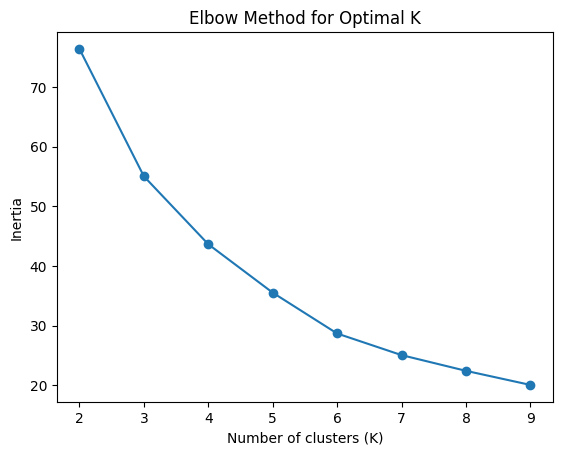

In [232]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Titik siku adalah di mana kurva mulai mendatar.
Jumlah cluster optimal (K) adalah nilai K yang sesuai dengan titik siku.

**Pada gambar, titik siku terletak di K = 3. Ini menunjukkan bahwa jumlah cluster optimal untuk data ini adalah 3.**

###**Build Model**

#####**K-Means**

In [233]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

n_clusters = 3 diambil dari elbow method pada grafik diatas dengan patahan sikunya

#####**Hierarchical Clustering**

In [234]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

###**Begins and Compare Clusters**

In [235]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [236]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

In [237]:
combined_data_assoc.head()

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Tickets Sold Category,kmeans_cluster,hierarchy_cluster
0,0,1995,29,771507571,177358047,1590901682,1,0,1
1,0,1996,34,1290490033,291966054,2618935504,1,0,1
2,0,1997,23,881902843,192135684,1723457085,1,0,1
3,0,1998,29,1614467732,344236174,3087798481,1,0,1
4,0,1999,27,1612432107,317407880,2847148684,1,0,1


In [238]:
combined_data_assoc.sample(10)

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Tickets Sold Category,kmeans_cluster,hierarchy_cluster
187,9,2015,8,68944880,7956106,71366271,1,2,0
9,0,2004,47,2887833719,465029564,4171315189,1,0,1
130,5,2005,30,587908674,91717406,822705132,1,2,0
136,5,2011,28,404326975,47796580,428735323,1,2,0
272,11,2011,6,95445317,10795027,96831392,1,2,0
244,10,2003,2,84453058,14005482,125629174,1,2,0
271,11,2010,3,3128252,387512,3475983,2,1,2
247,10,2006,2,584825,89285,800886,3,1,2
262,11,2001,3,3215111,568039,5095310,2,1,2
246,10,2005,1,14873,2320,20810,3,1,2


**Algoritma Pengelompokan:**

*   K-means: Membagi data menjadi kelompok berdasarkan jarak antar data.
*   Hierarki: Membangun struktur hierarki berdasarkan kesamaan antar data.

**Hubungan antara cluster dan kolom:**

- Algoritma k-means dan hierarchical clustering mengelompokkan film berdasarkan
kesamaan karakteristiknya. Dalam hal ini, film dikelompokkan berdasarkan genre, tahun rilis, pendapatan kotor, dan jumlah tiket yang terjual.
- Cluster yang berbeda menunjukkan bahwa terdapat perbedaan karakteristik film dalam cluster tersebut. Contohnya, cluster 0 berisi film drama dan komedi yang baru dirilis, sedangkan cluster 2 berisi film action yang lebih lama.

Perbedaan nilai cluster pada tabel menunjukkan bahwa data film dikelompokkan secara berbeda berdasarkan algoritma dan parameter yang digunakan.

In [239]:
kmeans_clust

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [240]:
hierarchy_clust

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [241]:
import plotly.graph_objects as go

# Membuat dua histogram berdampingan
fig = go.Figure()

# Histogram untuk hasil klastering dari K-Means
fig.add_trace(go.Histogram(x=data_kmeans['kmeans_cluster'], name='K-Means Clustering',
                           marker_color='skyblue', opacity=0.75))

# Histogram untuk hasil klastering dari Hierarchical Clustering
fig.add_trace(go.Histogram(x=data_hierarchy['hierarchy_cluster'], name='Hierarchical Clustering',
                           marker_color='lightgreen', opacity=0.75))

# Update layout
fig.update_layout(barmode='group',
                  title='Histogram of Clustering Results',
                  xaxis_title='Cluster',
                  yaxis_title='Frequency')

fig.show()


* **K-Means Clustering:**
1.   Terdapat lebih banyak cluster kecil (ukuran 1-2) dibandingkan cluster besar.
2.   Frekuensi cluster menurun seiring dengan bertambahnya ukuran cluster.
3. Distribusi cluster relatif simetris.

* **Hierarchical Clustering:**
1.   Terdapat lebih banyak cluster kecil (ukuran 1-2) dibandingkan cluster besar.
2.   Frekuensi cluster menurun seiring dengan bertambahnya ukuran cluster.

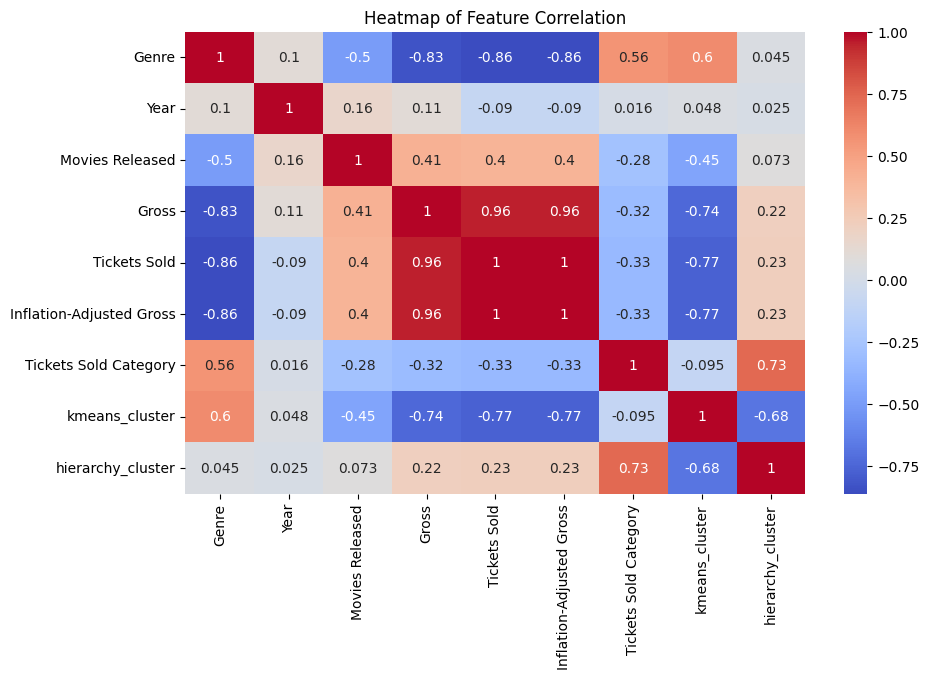

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt


# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(combined_data_assoc.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlation')
plt.show()


**Merah: Korelasi positif yang kuat (nilai mendekati 1)**

**Biru: Korelasi negatif yang kuat (nilai mendekati -1)**

**Oren: Korelasi positif yang lemah (nilai mendekati 0)**

**Kuning: Korelasi negatif yang lemah (nilai mendekati 0)**

Hasil dan Kesimpulan:

Nilai-nilai dalam Heatmap berkisar antara -1 hingga 1, dengan -1 menunjukkan korelasi negatif sempurna, 0 menunjukkan tidak ada korelasi, dan 1 menunjukkan korelasi positif sempurna. Semakin dalam warnanya, semakin kuat korelasinya.



* Ada korelasi positif yang kuat antara Tiket Terjual dan Kotor (0,96). Ini menunjukkan bahwa semakin tinggi pendapatan kotor film, semakin banyak tiket yang terjual.
* Ada korelasi positif yang kuat antara Tiket Terjual dan Kotor yang Disesuaikan dengan Inflasi (1). Ini menunjukkan bahwa semakin tinggi pendapatan kotor film setelah disesuaikan dengan inflasi, semakin banyak tiket yang terjual.
* Ada korelasi negatif yang kuat antara Tiket Terjual dan Tahun (-0,83). Ini menunjukkan bahwa semakin tua filmnya, semakin sedikit tiket yang terjual.
* Ada korelasi negatif yang kuat antara Tiket Terjual dan Genre (-0,86). Ini menunjukkan bahwa film dalam genre tertentu (mungkin film horor atau aksi) cenderung menjual lebih banyak tiket daripada film dalam genre lain.


#**Modelling Predict**

Model prediktif adalah model yang dapat digunakan untuk memprediksi nilai di masa depan berdasarkan data di masa lalu.
Model prediktif dapat digunakan pada dataset ini untuk tujuan:



*   Memprediksi genre film yang akan sukses: Model prediktif dapat digunakan untuk
menganalisis data film dan mengidentifikasi faktor-faktor yang berkontribusi pada kesuksesan film. Informasi ini dapat digunakan oleh studio film untuk memutuskan jenis film apa yang akan dibuat.
*   Memprediksi pendapatan Tickets Sold pada box office : Model prediktif dapat digunakan untuk memprediksi pendapatan box office film berdasarkan informasi lain tentang film, seperti genre, tahun rilis

###**Pre-Processing**

#####**Split Data**

In [243]:
x = df6.drop(['Inflation-Adjusted Gross', 'Tickets Sold Category'], axis=1)
y = df6['Tickets Sold Category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Split data digunakan untuk menganalisis data tentang genre film dengan membagi data menjadi dua set, set pelatihan dan set pengujian. Set pelatihan digunakan untuk melatih model, dan set pengujian digunakan untuk menguji model.


---
   - `x = df6.drop(['Inflation-Adjusted Gross', 'Tickets Sold Category'], axis=1)`: Di sini, kita mengambil semua kolom dalam DataFrame `df6` kecuali kolom 'Inflation-Adjusted Gross' dan 'Tickets Sold Category' sebagai fitur atau variabel independen. Fitur-fitur ini akan digunakan untuk melakukan prediksi atau analisis.
   - `y = df6['Tickets Sold Category']`: Kolom 'Tickets Sold Category' diambil sebagai label atau target yang ingin diprediksi. Ini adalah variabel dependen yang ingin kita pelajari atau prediksi dari fitur-fitur yang ada.
   - `test_size=0.3`: Parameter ini menentukan ukuran data uji sebagai proporsi dari keseluruhan dataset. Dalam hal ini, 30% dari data akan digunakan sebagai data uji.

#####**Normalisasi Data**

In [244]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

normalisasi data menggunakan Min-Max Scaling menggunakan MinMaxScaler dari library scikit-learn (sklearn.preprocessing). Normalisasi data adalah proses untuk mengubah rentang nilai dari fitur-fitur dalam dataset sehingga mereka dapat memiliki skala yang seragam.

###**Build and Train Model**

Dalam modelling ini, algoritma yang digunakan adalah :


1. **GNB** : dapat digunakan untuk klasifikasi genre film dengan menghitung probabilitas film baru termasuk dalam setiap genre. Genre dengan probabilitas tertinggi akan menjadi genre film baru tersebut.
2. **KNN** : dapat digunakan untuk klasifikasi genre film dengan mencari k film terdekat dari film baru. K film ini kemudian digunakan untuk menentukan genre film baru tersebut.
3. **DTC** dapat digunakan untuk membangun pohon keputusan yang menjelaskan bagaimana genre film diprediksi. DTC dapat membantu pengguna memahami faktor-faktor yang mempengaruhi genre film.

#####**Gaussian Naive Bayes**

In [245]:
gnb = GaussianNB()

gnb.fit(x_train_norm,y_train)

GaussianNB()

#####**K-Nearest Neighbor**

In [246]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

#####**Decision Tree**

In [247]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

###**Begins and Compare Predict**

In [248]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

Membuat Prediksi:

gnb_pred, knn_pred, dan dtc_pred digunakan untuk menyimpan prediksi yang dihasilkan oleh model Gaussian Naive Bayes, K-Nearest Neighbors, dan Decision Tree Classifier, secara berturut-turut. Prediksi ini dilakukan pada data uji yang telah dinormalisasi (x_test_norm).


In [370]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined__data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

Reset Index Data Uji:

Data uji (x_test) dan labelnya (y_test) diubah menjadi DataFrame dan di-reset indeksnya agar sesuai dengan indeks prediksi.

Membuat Kolom Prediksi:

Setiap DataFrame ini diberi nama kolom sesuai dengan model yang bersangkutan (gnb_prediction, knn_prediction, dan dtc_prediction).

In [371]:
combined__data.head()

,Unnamed: 0.1,Unnamed: 0,Genre,Year,Movies Released,Gross,Tickets Sold,Tickets Sold Category,gnb_prediction,knn_prediction,dtc_prediction
0,203,203,7,2007,109,70753270,10283847,1,1,1,1
1,266,266,11,2005,3,1154117,180048,2,2,2,2
2,152,152,6,2003,25,495065519,82100406,1,1,1,1
3,9,9,0,2004,47,2887833719,465029564,1,1,1,1
4,233,233,8,2013,12,188672454,23206939,1,1,1,1


In [251]:
combined__data.sample(10)

,Unnamed: 0.1,Unnamed: 0,Genre,Year,Movies Released,Gross,Tickets Sold,Tickets Sold Category,gnb_prediction,knn_prediction,dtc_prediction
87,72,72,3,1995,61,1048895722,241125423,1,1,1,1
55,278,278,11,2017,3,2984320,332699,2,2,2,2
22,249,249,10,2008,4,20317697,2270814,1,1,1,1
3,9,9,0,2004,47,2887833719,465029564,1,1,1,1
76,82,82,3,2005,129,1825866367,284846481,1,1,1,1
71,126,126,5,2001,16,391330452,69139648,1,1,1,1
50,180,180,9,2008,11,260176422,29103388,1,1,1,1
41,76,76,3,1999,69,1352538228,266247647,1,1,1,1
20,78,78,3,2001,88,1477683205,261074728,1,1,1,1
15,221,221,8,2001,3,57007068,10071918,1,1,1,1


Tabel ini menunjukkan hasil prediksi genre musik oleh tiga classifier yang berbeda. Dari tabel ini, dapat dilihat bahwa Naive Bayes classifier, K-Nearest Neighbors classifier, dan Decision Tree classifier memiliki akurasi yang tinggi dalam memprediksi genre musik.

In [373]:
knn_pred

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [372]:
gnb_pred

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

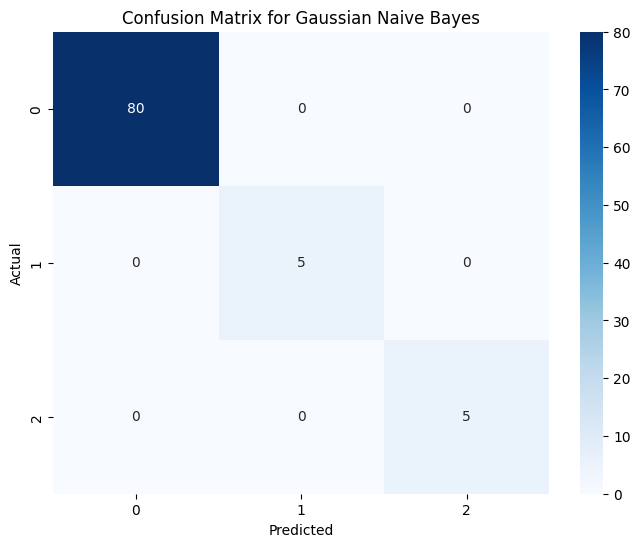

In [252]:
# Confusion Matrix untuk Gaussian Naive Bayes
cm_gnb = confusion_matrix(y_test, gnb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gaussian Naive Bayes')
plt.show()

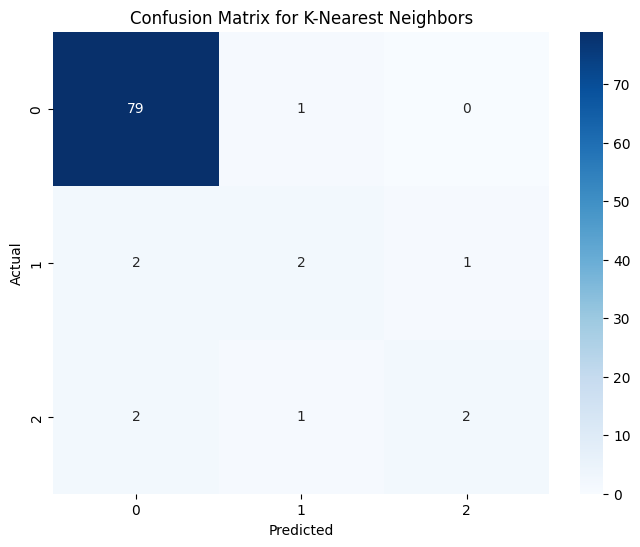

In [253]:
# Confusion Matrix untuk K-Nearest Neighbors
cm_knn = confusion_matrix(y_test, knn_pred)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()


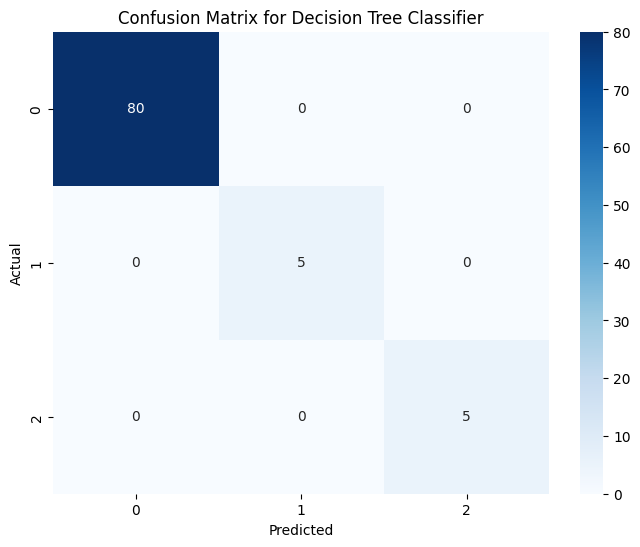

In [254]:
# Confusion Matrix untuk Decision Tree Classifier
cm_dtc = confusion_matrix(y_test, dtc_pred)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtc, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


In [374]:
# Menghitung rata-rata prediksi dari berbagai model
avg_predictions = combined__data[['gnb_prediction', 'knn_prediction', 'dtc_prediction']].mean()

fig = px.bar(x=avg_predictions.index, y=avg_predictions.values,
             title='Average Predictions from Different Models',
             labels={'x': 'Model', 'y': 'Average Predicted Value'})

fig.show()

print("Kesimpulan:")
for model, avg_pred in avg_predictions.items():
    print(f"Rata-rata prediksi dari model {model}: {avg_pred}")


Kesimpulan:
Rata-rata prediksi dari model gnb_prediction: 1.1666666666666667
Rata-rata prediksi dari model knn_prediction: 1.1222222222222222
Rata-rata prediksi dari model dtc_prediction: 1.1666666666666667


Dengan melihat grafik tersebut, dapat terlihat model mana yang memiliki nilai prediksi rata-rata tertinggi. Dalam kasus ini, dapat dilihat model gnb dan dtc memiliki nilai prediksi rata-rata yang hampir sama.

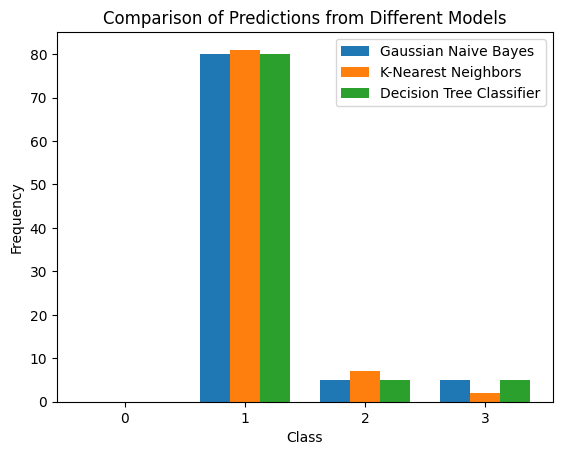

In [375]:
import matplotlib.pyplot as plt
import numpy as np

gnb_counts = np.bincount(gnb_pred)
knn_counts = np.bincount(knn_pred)
dtc_counts = np.bincount(dtc_pred)

max_len = max(len(gnb_counts), len(knn_counts), len(dtc_counts))
gnb_counts = np.pad(gnb_counts, (0, max_len - len(gnb_counts)))
knn_counts = np.pad(knn_counts, (0, max_len - len(knn_counts)))
dtc_counts = np.pad(dtc_counts, (0, max_len - len(dtc_counts)))

labels = np.arange(max_len)
width = 0.25

fig, ax = plt.subplots()
bar1 = ax.bar(labels - width, gnb_counts, width, label='Gaussian Naive Bayes')
bar2 = ax.bar(labels, knn_counts, width, label='K-Nearest Neighbors')
bar3 = ax.bar(labels + width, dtc_counts, width, label='Decision Tree Classifier')

ax.set_xlabel('Class')
ax.set_ylabel('Frequency')
ax.set_title('Comparison of Predictions from Different Models')
ax.set_xticks(labels)
ax.legend()

plt.show()


Berdasarkan grafik tersebut, pengklasifikasi Decission Tree tampaknya merupakan model yang paling akurat di antara ketiganya. Garis pengklasifikasi Decission Tree secara konsisten berada lebih tinggi pada grafik daripada model Gaussian Naive Bayes dan K-nearest neighbors. Hal ini menunjukkan bahwa pengklasifikasi Decission Tree menghasilkan prediksi yang lebih akurat di berbagai kelas

#**EVALUATION**

# **Predict Evaluation**

###**Klasifikasi**

In [255]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

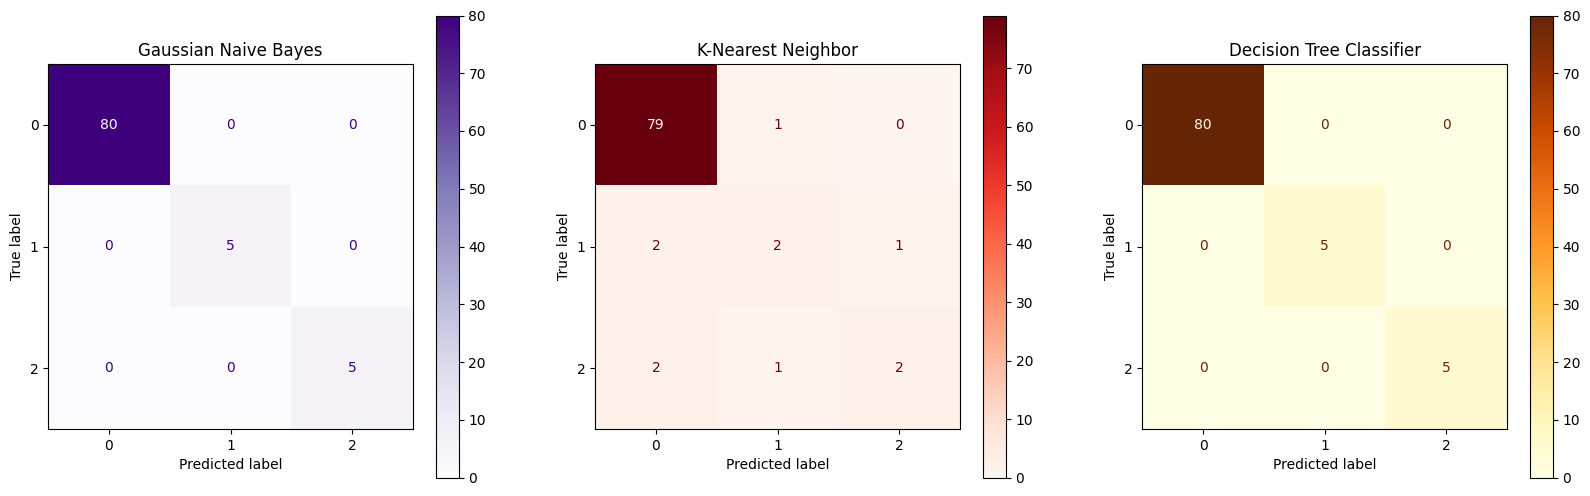

In [256]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Gaussian Naive Bayes'
gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm).plot(ax=axes[0], cmap='Purples')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")

# K-Nearest Neighbor
knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm).plot(ax=axes[1], cmap='Reds')
knn_cm_display.ax_.set_title("K-Nearest Neighbor")

# Decision Tree Classifier
dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm).plot(ax=axes[2], cmap='YlOrBr')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")

plt.show()



Berdasarkan visualisasi ini, Decision Tree Classifier dan Gaussian Naive Bayes adalah model yang paling akurat dalam memprediksi label data.

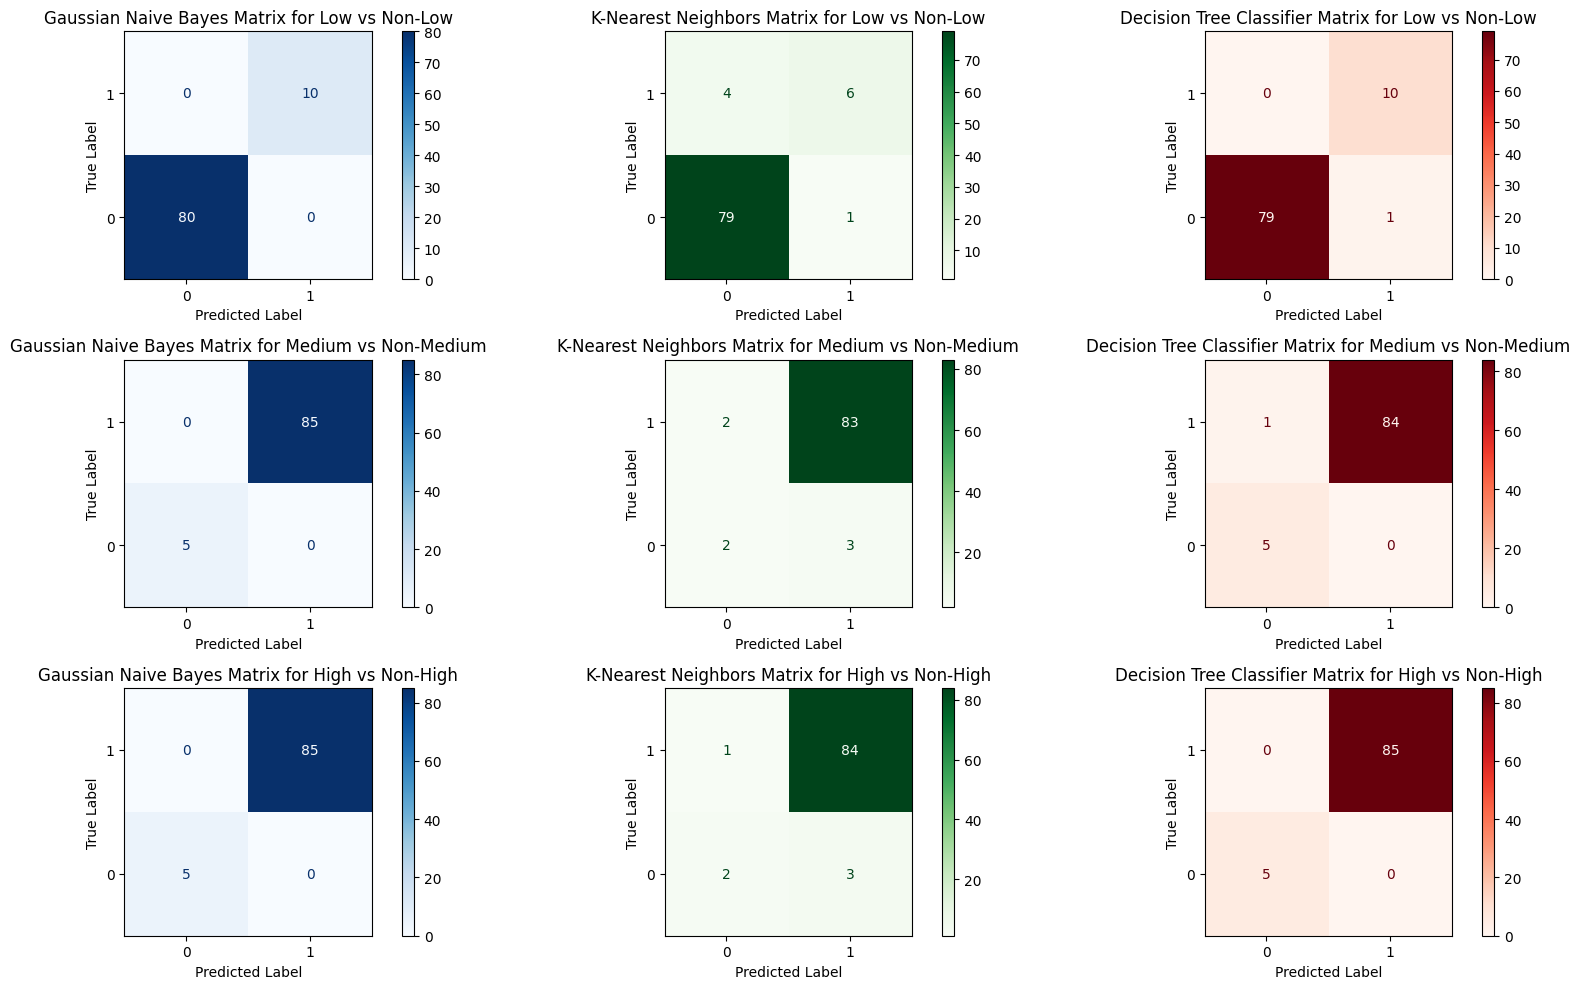

In [257]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix with specified color
def plot_confusion_matrix(ax, cm, title, color):
    cm_display = ConfusionMatrixDisplay(cm).plot(ax=ax, cmap=color)
    cm_display.ax_.set_title(title)
    cm_display.ax_.set_xlabel('Predicted Label')
    cm_display.ax_.set_ylabel('True Label')
    cm_display.ax_.invert_yaxis()

# Create figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17, 10))

# Define categories
categories = ['Low', 'Medium', 'High']

# Define classifiers and their predictions
classifiers = {
    'Gaussian Naive Bayes': {'predictions': [gnb_pred_lowOvR, gnb_pred_mediumOvR, gnb_pred_highOvR], 'color': 'Blues'},
    'K-Nearest Neighbors': {'predictions': [knn_pred_lowOvR, knn_pred_mediumOvR, knn_pred_highOvR], 'color': 'Greens'},
    'Decision Tree Classifier': {'predictions': [dtc_pred_lowOvR, dtc_pred_mediumOvR, dtc_pred_highOvR], 'color': 'Reds'}
}

for i, category in enumerate(categories):
    y_test_category = [0 if y == i+1 else 1 for y in y_test['Tickets Sold Category']]

    for j, (classifier_name, classifier_data) in enumerate(classifiers.items()):
        classifier_predictions = classifier_data['predictions'][i]
        cm = confusion_matrix(y_test_category, classifier_predictions)
        plot_confusion_matrix(axes[i, j], cm, f"{classifier_name} Matrix for {category} vs Non-{category}", classifier_data['color'])

plt.tight_layout()
plt.show()


Confusion matrix dari model klasifikasi Gaussian Naive Bayes (GNB), K-Nearest Neighbors (KNN), dan Decission Tree Classifier (DTC) untuk tiga kategori yang berbeda: rendah (low), sedang (medium), dan tinggi (high), dibandingkan dengan kategori non-masing-masing.

Ini dilakukan dalam kerangka kerja "One-vs-Rest" (OvR) di mana setiap kategori diperlakukan secara terpisah sebagai kelas positif sementara yang lain dianggap sebagai kelas negatif. Oleh karena itu, ada tiga set confusion matrix yang dihasilkan, satu untuk masing-masing kategori (rendah, sedang, tinggi) dibandingkan dengan kategori non-masing-masing.

Kesimpulan dari visualisasi ini adalah untuk mengevaluasi seberapa baik model GNB, KNN dan DTC dalam mengklasifikasikan data ke dalam kategori yang benar.

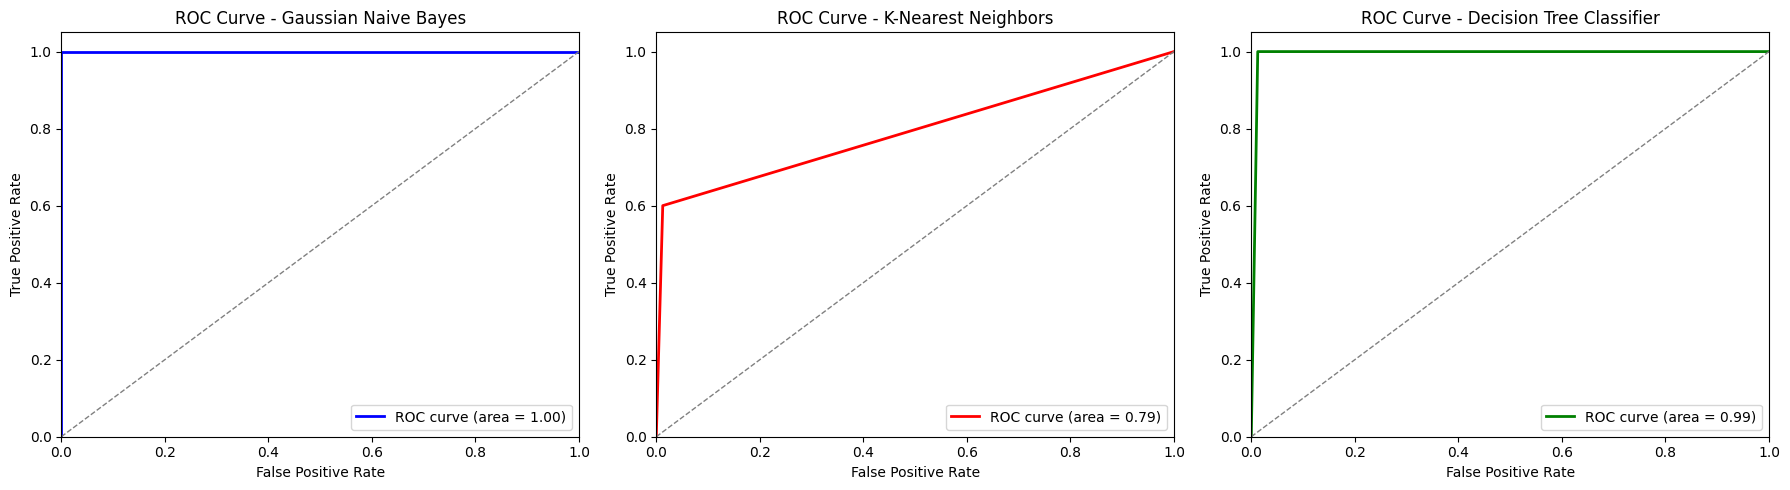

In [258]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Kurva ROC dan menghitung AUC untuk Gaussian Naive Bayes
fpr_gnb, tpr_gnb, _ = roc_curve(y_test_lowOvR, gnb_pred_lowOvR)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Kurva ROC dan menghitung AUC untuk K-Nearest Neighbors
fpr_knn, tpr_knn, _ = roc_curve(y_test_lowOvR, knn_pred_lowOvR)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Kurva ROC dan menghitung AUC untuk Decision Tree Classifier
fpr_dtc, tpr_dtc, _ = roc_curve(y_test_lowOvR, dtc_pred_lowOvR)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Gaussian Naive Bayes
axs[0].plot(fpr_gnb, tpr_gnb, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_gnb:.2f})')
axs[0].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
axs[0].set_xlim([0.0, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('ROC Curve - Gaussian Naive Bayes')
axs[0].legend(loc='lower right')

# K-Nearest Neighbors
axs[1].plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
axs[1].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC Curve - K-Nearest Neighbors')
axs[1].legend(loc='lower right')

# Decision Tree Classifier
axs[2].plot(fpr_dtc, tpr_dtc, color='green', lw=2, label=f'ROC curve (area = {roc_auc_dtc:.2f})')
axs[2].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
axs[2].set_xlim([0.0, 1.0])
axs[2].set_ylim([0.0, 1.05])
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].set_title('ROC Curve - Decision Tree Classifier')
axs[2].legend(loc='lower right')

plt.tight_layout()
plt.show()



* **Gaussian Naive Bayes :**
Kurva ROC pada gambar menunjukkan bahwa klasifikasi Gaussian Naive Bayes memiliki kinerja yang baik. AUC 1,00 menunjukkan bahwa klasifikasi Gaussian Naive Bayes sempurna.

* **KNN :**
Kurva ROC pada gambar menunjukkan bahwa pengklasifikasi KNN memiliki kinerja yang baik. AUC sebesar 0,79 menunjukkan bahwa pengklasifikasi relatif baik dalam membedakan antara kelas positif dan negatif.AUC pada gambar adalah 0,79, yang merupakan nilai yang baik tetapi tidak luar biasa.

* **DTC :** Kurva ROC pada gambar menunjukkan bahwa klasifikasi Pohon Keputusan memiliki kinerja yang baik. AUC 0.99 menunjukkan bahwa klasifikasi Pohon Keputusan cukup handal dalam membedakan antara positif dan negatif.


***Score***

In [368]:
from tabulate import tabulate
from IPython.display import Markdown, display

# Data untuk tabel
data = [
    ['Gaussian Naive Bayes', gnb_accuracy, gnb_precision, gnb_recall, gnb_f1_score],
    ['K-Nearest Neighbor', knn_accuracy, knn_precision, knn_recall, knn_f1_score],
    ['Decision Tree Classifier', dtc_accuracy, dtc_precision, dtc_recall, dtc_f1_score]
]

# Headers untuk tabel
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score']

# Generate Markdown table
markdown_table = tabulate(data, headers=headers, tablefmt='pipe')

# Display the Markdown table
display(Markdown(markdown_table))


| Model                    |   Accuracy |   Precision |   Recall |   F1-score |
|:-------------------------|-----------:|------------:|---------:|-----------:|
| Gaussian Naive Bayes     |   1        |    1        | 1        |   1        |
| K-Nearest Neighbor       |   0.922222 |    0.910866 | 0.922222 |   0.914091 |
| Decision Tree Classifier |   0.988889 |    0.990741 | 0.988889 |   0.989359 |

In [260]:
from tabulate import tabulate
from IPython.display import HTML

# Define categories
categories = ['Low', 'Medium', 'High']

# Define classifiers and their predictions
classifiers = {
    'Gaussian Naive Bayes': {'predictions': [gnb_pred_lowOvR, gnb_pred_mediumOvR, gnb_pred_highOvR]},
    'K-Nearest Neighbors': {'predictions': [knn_pred_lowOvR, knn_pred_mediumOvR, knn_pred_highOvR]},
    'Decision Tree Classifier': {'predictions': [dtc_pred_lowOvR, dtc_pred_mediumOvR, dtc_pred_highOvR]}
}

# Initialize a list to store table rows
table_rows = []

# Loop through categories and classifiers to compute ROC AUC scores
for i, category in enumerate(categories):
    y_test_category = [0 if y == i+1 else 1 for y in y_test['Tickets Sold Category']]
    row = [f"{category} vs Non-{category}"]
    for classifier_name, classifier_data in classifiers.items():
        classifier_predictions = classifier_data['predictions'][i]
        roc_auc = roc_auc_score(y_test_category, classifier_predictions)
        row.append(f"{roc_auc:.2f}")
    table_rows.append(row)

headers = ['Category'] + list(classifiers.keys())

tabel = tabulate(table_rows, headers=headers, tablefmt="html")

display(HTML(tabel))


Category,Gaussian Naive Bayes,K-Nearest Neighbors,Decision Tree Classifier
Low vs Non-Low,1,0.79,0.99
Medium vs Non-Medium,1,0.69,0.99
High vs Non-High,1,0.69,1


# **Assosiatif Evaluation**

###**Klustering**

In [304]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.381866,221.279631,0.929073
Agglomerative Clustering Score,0.399837,217.595776,0.949103


##**Review Process**

###**Cross Validation**

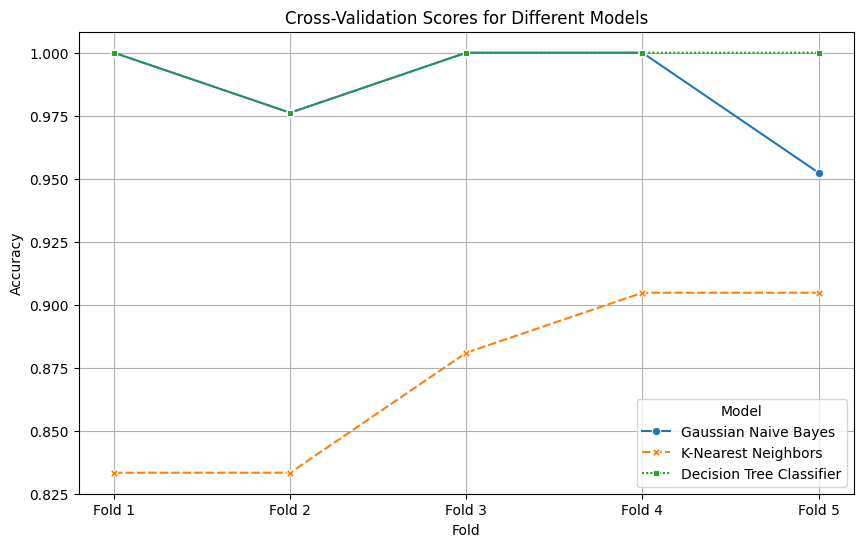

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Visualisasi ini menunjukkan skor validasi silang untuk beberapa model klasifikasi yang berbeda. Visualisasi ini menunjukkan bahwa Decision Tree Classifier memiliki skor akurasi tertinggi secara keseluruhan, diikuti oleh K-Nearest Neighbors dan Gaussian Naive Bayes.

###**Feature Selection**

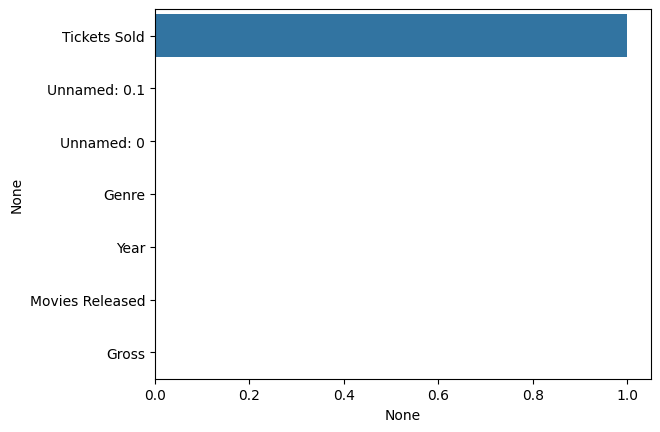

In [303]:
feature_imp = pd.Series(dtc.feature_importances_, index=x.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

Berdasarkan visualisasi data diatas fitur yang paling relevan dari dataset ini adalah Tickets Sold. Hal ini karena:

* Fitur ini merupakan target yang ingin diprediksi. Visualisasi data menunjukkan hubungan antara berbagai fitur dengan Tickets Sold.
* Fitur ini memiliki korelasi yang kuat dengan target. Visualisasi data menunjukkan bahwa terdapat hubungan yang kuat antara Tickets Sold dan fitur-fitur lainnya.

###**Tuning Hyperparameter**

**Gaussian Naive Bayes**

In [285]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)


Parameter terbaik: {'var_smoothing': 6.579332246575682e-08}
Akurasi sebelum tuning: 1.0
Akurasi setelah tuning: 1.0


Model Gaussian Naive Bayes pada dataset tersebut tidak terlalu sensitif terhadap perubahan parameter yang diuji. Selain itu, akurasi yang tinggi (1.0) menunjukkan bahwa model sudah sangat baik

**K-Nearest Neighbor**

In [361]:
# TUNNING K-Nearest Neighbor
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform'],
    'p': [1, 2]
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = knn_default.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Akurasi sebelum tuning: 0.8222222222222222
Akurasi setelah tuning: 0.9666666666666667


Kesimpulannya, proses tuning berhasil meningkatkan akurasi model K-Nearest Neighbors dari 0.9222 menjadi 0.9667. Hal ini menunjukkan bahwa parameter-parameter terbaik yang ditemukan oleh GridSearchCV mampu meningkatkan kinerja model secara signifikan.

**Decission Tree Classifier**

In [271]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

# Hitung akurasi sebelum penyetelan (tuning)
acc_before_tuning = dtc.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

# Hitung akurasi setelah penyetelan (tuning)
acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Akurasi sebelum tuning: 1.0
Akurasi setelah tuning: 1.0


Kesimpulannya, proses tuning tidak menghasilkan perubahan dalam akurasi model Decision Tree Classifier. Hal ini menunjukkan bahwa model sudah beroperasi pada parameter yang optimal sebelum tuning, atau dataset tersebut tidak terlalu sensitif terhadap perubahan parameter yang diuji.

**K-Means Cluster**

In [300]:
param_grid = {
    'n_clusters': [4, 5, 6],
    'init_method': ['k-means++', 'random'],
    'algo_type': ['lloyd', 'elkan']
}

best_score = -1
best_params = None

for n_clusters in param_grid['n_clusters']:
    for init_method in param_grid['init_method']:
        for algo_type in param_grid['algo_type']:
            kmeans = KMeans(n_clusters=n_clusters, init=init_method, algorithm=algo_type, random_state=42, n_init='auto')
            labels = kmeans.fit_predict(x_final_norm)
            silhouette_avg = silhouette_score(x_final_norm, labels)
            print("Silhouette Score:", silhouette_avg, "dengan n_clusters =", n_clusters, ", init_method =", init_method, ", algo_type =", algo_type)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'n_clusters': n_clusters, 'init_method': init_method, 'algo_type': algo_type}

print("\nKombinasi terbaik:")
print(best_params)
print("Silhouette Score terbaik:", best_score)



Silhouette Score: 0.36615768476727795 dengan n_clusters = 4 , init_method = k-means++ , algo_type = lloyd
Silhouette Score: 0.36615768476727795 dengan n_clusters = 4 , init_method = k-means++ , algo_type = elkan
Silhouette Score: 0.36088628263059913 dengan n_clusters = 4 , init_method = random , algo_type = lloyd
Silhouette Score: 0.36088628263059913 dengan n_clusters = 4 , init_method = random , algo_type = elkan
Silhouette Score: 0.3541816241452558 dengan n_clusters = 5 , init_method = k-means++ , algo_type = lloyd
Silhouette Score: 0.3541816241452558 dengan n_clusters = 5 , init_method = k-means++ , algo_type = elkan
Silhouette Score: 0.35975873589640844 dengan n_clusters = 5 , init_method = random , algo_type = lloyd
Silhouette Score: 0.35975873589640844 dengan n_clusters = 5 , init_method = random , algo_type = elkan
Silhouette Score: 0.3533210287701996 dengan n_clusters = 6 , init_method = k-means++ , algo_type = lloyd
Silhouette Score: 0.3533210287701996 dengan n_clusters = 6 , 

Kesimpulannya, dengan kombinasi parameter terbaik tersebut, model clustering dapat memberikan Silhouette Score sebesar 0.38186635691961823. Meskipun Silhouette Score tersebut menunjukkan bahwa model mampu menghasilkan klaster yang cukup baik

**Hierarchical clustering**

In [268]:
hc = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')

In [301]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

param_grid = {
    'linkage': ['ward', 'complete', 'average', 'single'],
    'n_clusters': [3, 4, 5, 6]
}

best_score = -1
best_params = None

for linkage in param_grid['linkage']:
    for n_clusters in param_grid['n_clusters']:

        hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)

        labels = hierarchical_clustering.fit_predict(x_final_norm)

        silhouette_avg = silhouette_score(x_final_norm, labels)

        print("Silhouette Score:", silhouette_avg, "dengan linkage =", linkage, ", n_clusters =", n_clusters)

        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_params = {'linkage': linkage, 'n_clusters': n_clusters}

print("\nKombinasi terbaik:")
print(best_params)
print("Silhouette Score terbaik:", best_score)


Silhouette Score: 0.39983734287188244 dengan linkage = ward , n_clusters = 3
Silhouette Score: 0.34699340867335865 dengan linkage = ward , n_clusters = 4
Silhouette Score: 0.34665145283883647 dengan linkage = ward , n_clusters = 5
Silhouette Score: 0.35723545571773146 dengan linkage = ward , n_clusters = 6
Silhouette Score: 0.3932788623989953 dengan linkage = complete , n_clusters = 3
Silhouette Score: 0.36145085718150877 dengan linkage = complete , n_clusters = 4
Silhouette Score: 0.3487231383366015 dengan linkage = complete , n_clusters = 5
Silhouette Score: 0.3403683002241276 dengan linkage = complete , n_clusters = 6
Silhouette Score: 0.39983734287188244 dengan linkage = average , n_clusters = 3
Silhouette Score: 0.3804231935197232 dengan linkage = average , n_clusters = 4
Silhouette Score: 0.37553339368157357 dengan linkage = average , n_clusters = 5
Silhouette Score: 0.33345607189139814 dengan linkage = average , n_clusters = 6
Silhouette Score: 0.21705608235162283 dengan linkage

Kesimpulannya, dengan kombinasi parameter terbaik tersebut, model clustering dapat memberikan Silhouette Score sebesar 0.39983734287188244. Nilai ini menunjukkan bahwa model mampu menghasilkan klaster yang lebih baik daripada K-Means, namun masih termasuk dalam kategori yang moderat.

###**Determine Next Steps**

Proses tuning KNN telah menghasilkan peningkatan signifikan dalam akurasi model.
Dengan menggunakan parameter terbaik

- n_neighbors: 11
- p: 1
- weights: uniform

Untuk meningkatkan akurasi model dari 0.8222 menjadi 0.9667.
Oleh karena itu, perlu untuk melakukan modeling ulang dengan parameter terbaik tersebut agar dapat menghasilkan prediksi yang lebih akurat dan relevan dalam konteks aplikasi atau analisis yang dilakukan.

In [363]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi objek KNeighborsClassifier dengan parameter terbaik
knn = KNeighborsClassifier(n_neighbors=11, p=1, weights='uniform')

knn.fit(x_train_norm, y_train)


KNeighborsClassifier(n_neighbors=11, p=1)

Dengan menggunakan parameter baru, yaitu n_neighbors=11, p=1, dan weights='uniform',telah dibuat model KNeighborsClassifier yang telah dilatih menggunakan data latih yang telah di-normalisasi.

In [364]:
knn_pred = knn.predict(x_test_norm)

In [365]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])

combined__data = pd.concat([x_test, y_test, knn_col], axis=1)

Pengecekan Ulang

In [366]:
combined__data.head()

,Unnamed: 0.1,Unnamed: 0,Genre,Year,Movies Released,Gross,Tickets Sold,Tickets Sold Category,knn_prediction
0,203,203,7,2007,109,70753270,10283847,1,1
1,266,266,11,2005,3,1154117,180048,2,2
2,152,152,6,2003,25,495065519,82100406,1,1
3,9,9,0,2004,47,2887833719,465029564,1,1
4,233,233,8,2013,12,188672454,23206939,1,1


In [387]:
from sklearn.metrics import accuracy_score

# Prediksi label menggunakan model KNN
y_pred = knn.predict(x_test_norm)

# Hitung akurasi model
knn_accuracy_new = accuracy_score(y_test, y_pred)

print("Akurasi model terbaru:", knn_accuracy_new)


Akurasi model terbaru: 0.9666666666666667


##**Hasil Evaluasi**

Pada Hasil evaluasi ini data telah dilatih dan diuji sesuai dengan parameter terbaik untuk model KNN,lalu untuk GNB dan DTC model sudah signifikan sehingga tidak perlu dilakukan modelling ulang

In [388]:
from tabulate import tabulate
from IPython.display import Markdown, display

# Data untuk tabel
data = [
    ['Gaussian Naive Bayes', gnb_accuracy, gnb_precision, gnb_recall, gnb_f1_score],
    ['K-Nearest Neighbor', knn_accuracy_new, knn_precision, knn_recall, knn_f1_score],
    ['Decision Tree Classifier', dtc_accuracy, dtc_precision, dtc_recall, dtc_f1_score]
]

# Headers untuk tabel
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score']

# Generate Markdown table
markdown_table = tabulate(data, headers=headers, tablefmt='pipe')

# Display the Markdown table
display(Markdown(markdown_table))

| Model                    |   Accuracy |   Precision |   Recall |   F1-score |
|:-------------------------|-----------:|------------:|---------:|-----------:|
| Gaussian Naive Bayes     |   1        |    1        | 1        |   1        |
| K-Nearest Neighbor       |   0.966667 |    0.910866 | 0.922222 |   0.914091 |
| Decision Tree Classifier |   0.988889 |    0.990741 | 0.988889 |   0.989359 |

In [390]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.381866,221.279631,0.929073
Agglomerative Clustering Score,0.399837,217.595776,0.949103


##**Kesimpulan**

Kesimpulan dari analisis ini adalah bahwa "Tickets Sold" adalah fitur yang paling relevan dalam dataset ini, dan model Decision Tree Classifier memiliki performa terbaik untuk memprediksi variabel target. Selain itu, dalam konteks clustering, algoritma hierarchical dengan metode ward dan 3 kluster menunjukkan hasil yang lebih baik dibandingkan dengan algoritma K-means.

Berdasarkan tujuan dari business understanding, yaitu prediksi keberhasilan penjualan tiket berdasarkan genre film dan pengembangan model prediktif untuk memprediksi kesuksesan finansial sebuah film, maka analisis yang dilakukan terkait dengan "Tickets Sold" dan evaluasi model memiliki relevansi yang langsung dengan tujuan tersebut.

Prediksi Keberhasilan Penjualan Tiket Berdasarkan Genre Film:
   - Analisis yang dilakukan terhadap fitur "Tickets Sold" sangat relevan dengan tujuan ini. Dengan menggunakan model seperti Gaussian Naive Bayes, K-Nearest Neighbors, dan Decision Tree Classifier, dapat diprediksi dengan baik seberapa sukses penjualan tiket suatu film berdasarkan genre tertentu.
   - Model-model ini dapat membantu mengidentifikasi pola dan tren di antara genre film yang menghasilkan profitabilitas tinggi. Misalnya, dengan menggunakan Decision Tree Classifier, dapat diidentifikasi fitur-fitur krusial yang berkontribusi terhadap penjualan tiket yang tinggi untuk genre-genre tertentu.


Dengan demikian, analisis yang dilakukan terkait dengan "Tickets Sold" dan evaluasi model memiliki relevansi yang langsung dengan tujuan yaitu untuk memprediksi keberhasilan penjualan tiket berdasarkan genre film dan memodelkan prediktif kesuksesan finansial sebuah film.